# <center> Unidad 3: Clustering</center>


## Introdución
En esta lección revisaremos el proceso de **Clustering** mediante el algoritmo de K-means. El **Clustering** o segmentación se basa en la asignación de puntos de datos a grupos basados en la similitud de los puntos entre sí. Un algoritmo de agrupación hace que "los pájaros del mismo plumaje se junten", por así decirlo.

Los algoritmos de aprendizaje automático pueden clasificarse en dos categorías: aprendizaje supervisado y aprendizaje no supervisado. También existen otras categorías, como el aprendizaje semisupervisado y el aprendizaje por refuerzo. Pero la mayoría de los algoritmos se clasifican en aprendizaje supervisado o no supervisado. La diferencia entre ellos se debe a la presencia de una variable objetivo. En el aprendizaje no supervisado, no hay variable objetivo. El conjunto de datos sólo tiene variables de entrada que describen los datos. Esto se denomina aprendizaje no supervisado.

**K-Means** es el algoritmo de aprendizaje no supervisado más popular. Se utiliza cuando tenemos datos no etiquetados, es decir, datos sin categorías o grupos definidos. El algoritmo sigue una forma fácil o sencilla de clasificar un conjunto de datos dado a través de un número determinado de clusters, fijado apriori. El algoritmo K-Means trabaja de forma iterativa para asignar cada punto de datos a uno de los K grupos basándose en las características que se proporcionan. Los puntos de datos se agrupan en función de la similitud de las características.

Cuando se utiliza para la ingeniería de características, podríamos intentar descubrir grupos de clientes que representen un segmento de mercado, por ejemplo, o zonas geográficas que compartan patrones climáticos similares. Añadir una característica de etiquetas de clúster puede ayudar a los modelos de aprendizaje automático a desenmarañar relaciones complicadas de espacio o proximidad.

El clustering de K-Means puede representarse graficamente de la siguiente manera:
![K-Means](https://miro.medium.com/max/2160/1*tWaaZX75oumVwBMcKN-eHA.png)


## K-means

En esta sesion revisaremos el algoritmo de aprendizaje automático no supervisado más popular: **K-means**. Así que, empecemos!

**K-means** no necesita etiquetas para ser entrenado. Por eso, surge la necesidad de descubrir **comportamientos similares y relaciones entre los datos** que me permitan agruparlos (creación de clusters) como se muestra en la imagen. Los clusters son en realidad grupos en los que se van a dividir los datos.

Pasos:

1) Decidimos cuántos clusters queremos identificar. 

<img src="https://storage.googleapis.com/datasets-academy/00%20Databits/Marketing_Analytics/kmeans_1.png" alt="Databricks Learning" style="width: 10%;">

2) Aleatoriamente se asigna un punto o centroide por cada clusters.

<img src="https://storage.googleapis.com/datasets-academy/00%20Databits/Marketing_Analytics/kmeans_2.png" alt="Databricks Learning" style="width: 10%;">

3) Para cada dato se evalua cuál es el centroide más cercano en distancia y se asigna el dato a ese clúster.

<img src="https://storage.googleapis.com/datasets-academy/00%20Databits/Marketing_Analytics/kmeans_3.png" alt="Databricks Learning" style="width: 10%;">

4) Tomamos todos los puntos asignados a cada clúster y calcularemos cuál sería su punto medio en el espacio.

<img src="https://storage.googleapis.com/datasets-academy/00%20Databits/Marketing_Analytics/kmeans_4.png" alt="Databricks Learning" style="width: 10%;">

5) Ahora los nuevos centroides corresponderan a los puntos medios calculados en el paso anterior para cada cluster.

6) Repetiremos iterativamente desde el paso 3 hasta converger.

**K-means** es ampliamente utilizado para muchas aplicaciones que incluyen:

  1. Segmentación de imágenes

  2. Segmentación de clientes

  3. Detección de anomalías

# Caso práctico

Este material expande el marco inicial de las técnicas de segmentación y aborda la temática en un contexto del análisis y resolución de un caso práctico con Python. Tiene por objetivo analizar la aplicabilidad de los métodos de clusterización para la segmentación de clientes usando como referencia las 9 etapas del ciclo de vida del Big Data.

## Sobre la empresa
XXXXXX



## 1. Evaluación de necesidades del negocio
La fase de evaluación del caso de negocio requiere que se cree, evalúe y apruebe un caso de negocio antes de proceder a las tareas reales de análisis práctico.

Uno de los desafíos que se ha planteado AGORA Group es segmentar sus clientes de manera que los esfuerzos comerciales de la empresa sean correctamente dirigidos en base a la misma información que genera la organización.Para ello la empresa cuenta con información de las transacciones de compras de los ultimos años.

# 2. Identificación de datos
La etapa de identificación de datos consiste en identificar los conjuntos de datos necesarios para el proyecto de análisis y sus fuentes.


**Dataset** 

El conjunto de datos se refiere a los clientes de un distribuidor mayorista. Incluye el gasto anual en unidades monetarias (u.m.) en diversas categorías de productos.

**Diccionario de datos**

* `fresh`: gasto anual (m.u.) en productos frescos.
* `leche`: gasto anual (m.u.) en productos lácteos.
* `alimentos`: gasto anual (m.u.) en productos alimenticios.
* `congelados`: gasto anual (m.u.) en productos congelados.
* `detergentes_papel`: gasto anual (m.u.) en detergentes y productos de papel.
* `delicatessen`: gasto anual (m.u.) en productos delicatessen.
* `canal`: Canal de clientes - Horeca (Hotel / Restaurante / Cafetería) o Canal Minorista.
* `region`: clientes Región Lisnon, Oporto u Otro.

# 3. Adquisición y filtrado de datos
Durante la etapa de adquisición y filtrado de datos se recopilan los datos de todas las fuentes de datos que se identificaron durante la etapa Identificación de datos.


El conjunto de datos planteado contiene información sobre el comportamiento de compra de 2.000 individuos de una zona determinada al entrar en una tienda física de productos de gran consumo. Todos los datos se han recogido a través de las tarjetas de fidelización que utilizan en caja. Los datos han sido preprocesados y no faltan valores. Además, el volumen del conjunto de datos se ha restringido y anonimizado para proteger la privacidad de los clientes. 

# 4. Extracción de datos
Durante esta etapa se debe extraer datos dispares y transformarlos en un formato que pueda facilitar el análisis de datos. 

**Instalar librerías**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

**Cargar el dataset**

In [21]:
dataset = pd.read_csv('https://storage.googleapis.com/datasets-academy/00%20Databits/Marketing_Analytics/retail.csv',sep=";")
dataset.head()

,canal,region,fresh,leche,alimentos,congelados,detergentes_papel,delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [22]:
#Seleccionamos las columnas necesarias
dataset=dataset[["fresh", "leche","alimentos","congelados","detergentes_papel","delicatessen"]]
dataset.head()

,fresh,leche,alimentos,congelados,detergentes_papel,delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


# 5. Validación y limpieza de datos
Los datos no válidos pueden sesgar y falsear los resultados de los análisis. La etapa de validación y depuración de datos se enfoca en establecer reglas de validación a menudo complejas y a eliminar cualquier dato no válido conocido.

**EDA - Análisis estadístico de los datos**

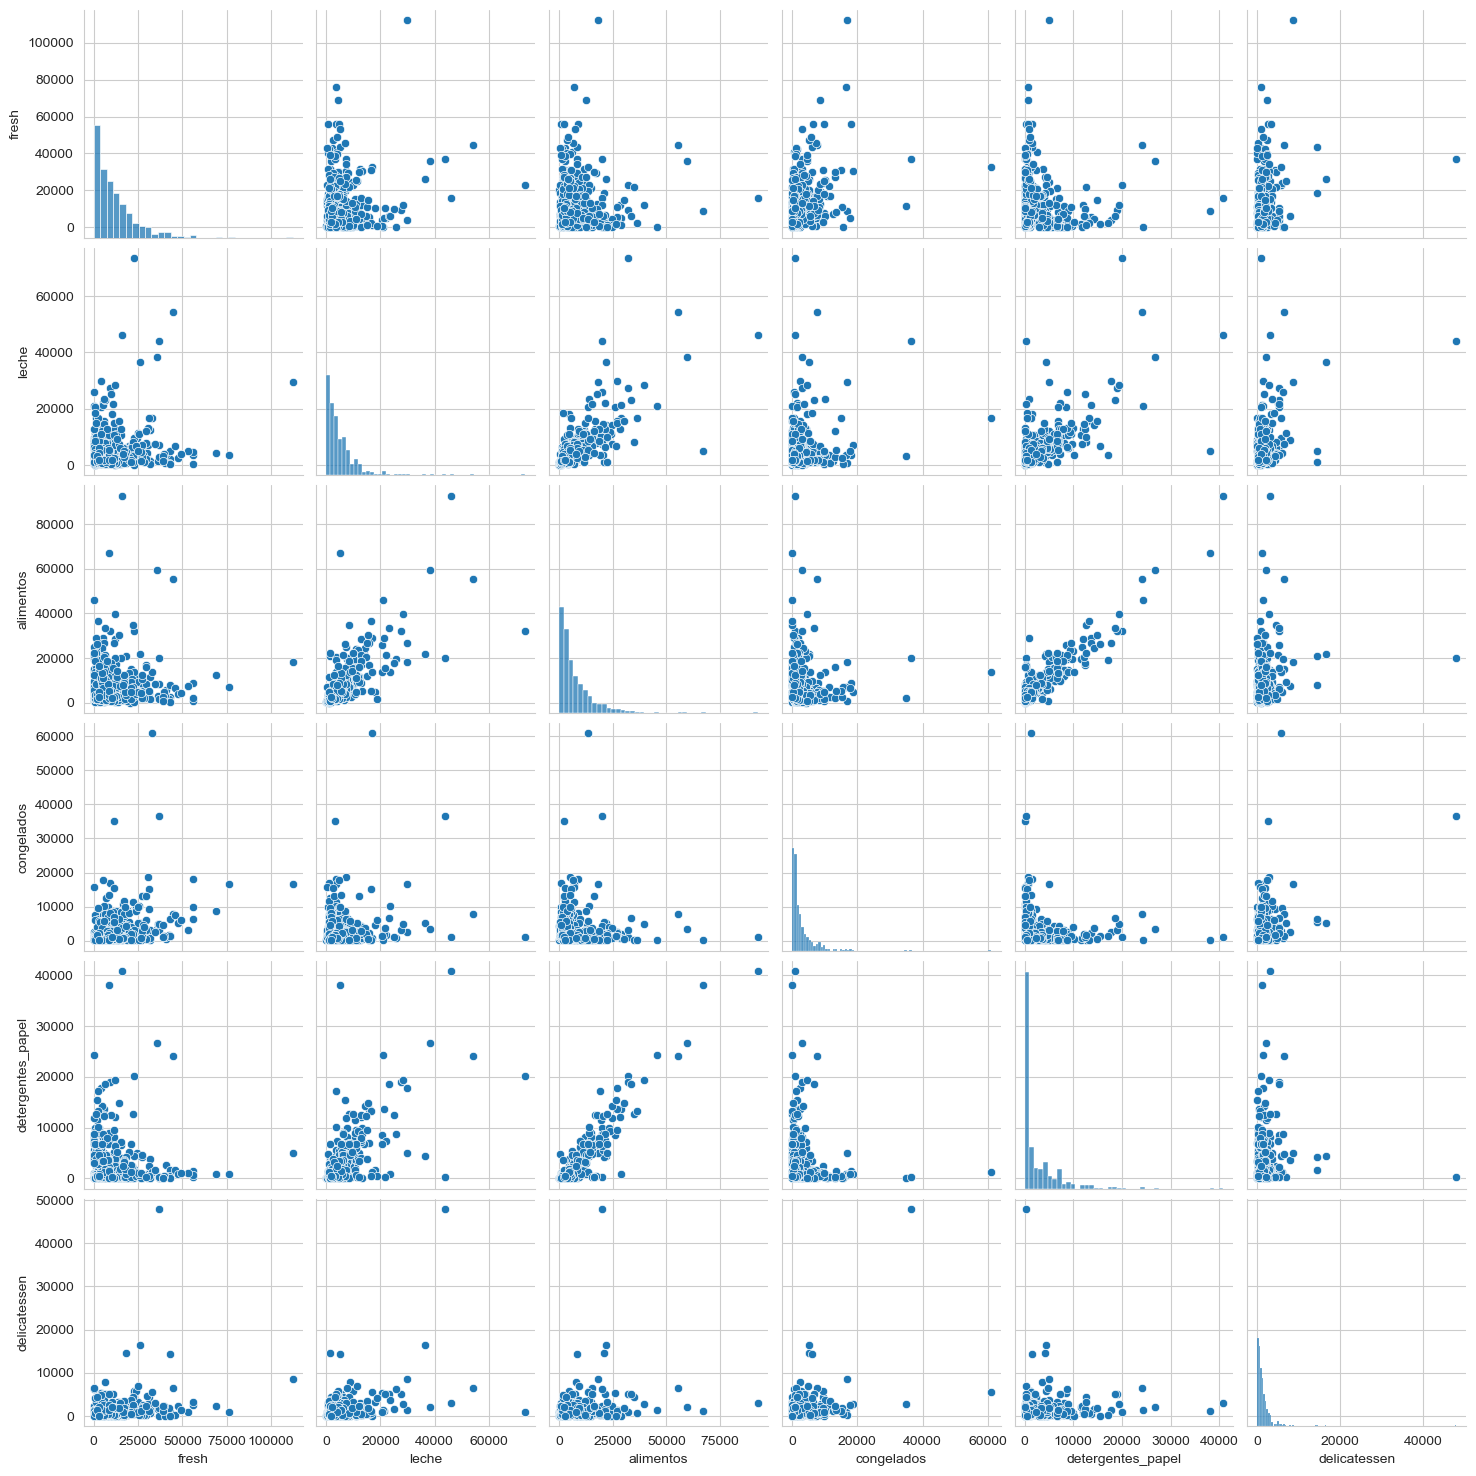

In [7]:
sns.set_style("whitegrid")
sns.pairplot(dataset)

Algunos conclusiones:

* La venta de detergentes y papel está relacionado con la venta de alimentos, a medida que incrementa uno incrementa también el otro.
* Los alimentos y la leche también presentan un relación, a medida que incrementa uno incrementa también el otro.

# 6. Agregación y representación de datos
La etapa de agregación y representación de datos, se dedica a integrar múltiples conjuntos de datos para obtener una visión unificada.


Este caso de uso no requiere la integración de otros datos.

# 7. Análisis de datos
La etapa de análisis de datos se enfoca en llevar a cabo la tarea de análisis propiamente dicha, que suele implicar uno o más tipos de análisis

**Implementación K-means**
#### Número óptimo de clusters

**Reto:** el primer reto que se presenta al aplicar métodos de Clustering es definir el número adecuado de grupos en los que se va a dividir los datos. Aunque en principio no existe un criterio fijo, dependerá de cómo lo defina el negocio. También se podría utilizar alguno de los métodos como el **método del codo** (elbow method) o **análisis de la silueta**. En este ejemplo particular, utilizaremos el método del codo.

**Consideraciones:** tenga en cuenta que una mala elección del número de Clusters podría generar pocos Clusters con datos muy heterogéneos o muchos Clusters datos muy similares.

#### Método del codo (Elbow Method)
Las siguientes líneas de código le ayudarán a implementar el método del codo, analizando el número de Clusters de 2 a 15.

In [8]:
wcss = []
for i in range(2, 15):
    kmeans = KMeans(n_clusters   = i, 
                    init         = 'k-means++', 
                    max_iter     = 300, 
                    n_init       = 10, 
                    random_state = 42)
    kmeans.fit(dataset)
    wcss.append(kmeans.inertia_)
    
numero_clusteres = list(enumerate(wcss, start = 1))
metrica_wcss = np.array(numero_clusteres)
df_wcss= pd.DataFrame(data = metrica_wcss, columns = ['NUM_CLUSTERS','ERROR'], index = range(2, 15))

plt.figure(figsize=(16,6))
plt.plot(df_wcss.NUM_CLUSTERS, df_wcss.ERROR, marker = "o" );

Este método es bastante claro y útil porque indica que al aumentar el número de grupos ayuda a separar los clusters de manera significativa. Además, la curva indica que los clústeres adicionales más allá del tercero generan poco valor.

#### Método de la silueta
Las siguientes líneas de código le ayudarán a implementar el método de la silueta, analizando el número de Clusters de 2 a 15.

In [9]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for i in range_n_clusters:
    kmeans = KMeans(n_clusters   = i, 
                    init         = 'k-means++', 
                    max_iter     = 300, 
                    n_init       = 10, 
                    random_state = 42)
    cluster_labels = kmeans.fit_predict(dataset)
    silhouette_avg = silhouette_score(dataset, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
    
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

#### Aplicamos KMeans con el número de clústers óptimo
A continuación se va a entrenar el modelo Clustering, siendo k el número de clusters óptimo elegido, en este caso 3.

In [10]:
#El número de clústers
k=3
#Definición de parámetos del modelo
kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
#Entrenamiento del modelo
etiqueta = kmeans.fit(dataset)

#### Centroides de cada cluster
Con el siguiente comando podemos acceder a los cetroides de nuestro modelo entrenado en total tendríamos 3 centroides uno por cada clúster.

In [11]:
kmeans.cluster_centers_

array([[35941.4       ,  6044.45      ,  6288.61666667,  6713.96666667,
         1039.66666667,  3049.46666667],
       [ 8253.46969697,  3824.6030303 ,  5280.45454545,  2572.66060606,
         1773.05757576,  1137.4969697 ],
       [ 8000.04      , 18511.42      , 27573.9       ,  1996.68      ,
        12407.36      ,  2252.02      ]])

#### Asignar las etiquetas de los clusters al dataset

In [12]:
# Guardamos las etiquetas, el número de cluster al que pertenece 
etiquetas = kmeans.labels_
# Agregamos al dataset la etiqueta
dataset['Cluster_kmeans'] = etiquetas
dataset.head()

,fresh,leche,alimentos,congelados,detergentes_papel,delicatessen,Cluster_kmeans
0,12669,9656,7561,214,2674,1338,1
1,7057,9810,9568,1762,3293,1776,1
2,6353,8808,7684,2405,3516,7844,1
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,0


# 8. Visualización de datos
La capacidad de analizar grandes cantidades de datos y obtener información útil tiene poco valor si los únicos que pueden interpretar los resultados son los analistas.
La etapa de visualización de datos se dedica a utilizar técnicas y herramientas de visualización de datos para comunicar gráficamente los resultados del análisis con vistas a una interpretación eficaz por parte de los usuarios empresariales.

**Evaluación de las características de cada clúster**

A continuación, se presentan solo algunos ejemplos de las comparaciones que se pueden realizar entre los clusters y productos.

#### Análisis del gasto anual en Alimentos vs Detergente y papel
 * Claramente se observa la estrecha relación que existe entre la venta de alimentos y detergentes y papel, están directamente correlacionados. Es decir, si incrementa el monto de detergentes y papel el monto de alimentos también incrementará. 

 * Adicionalmente se puede observar que el clúster 2 esta conformado por personas que realizan mayores gastos comparado con el resto de clusters.

In [23]:
sns.lmplot( 'detergentes_papel','alimentos',  data=dataset,
        hue = 'Cluster_kmeans',
        fit_reg=False, size = 5 );

C:\Users\victo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\victo\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


KeyError: "['Cluster_kmeans'] not in index"

#### Análisis del gasto anual en Leche vs Alimentos
 * Una situación similar ocurre con la venta de Leche vs Alimentos, están ligeramente correlacionados.
 * Presenta la misma característica el clúster 2 que esta conformado por personas que realizan mayores gastos de leche y alimentos.

In [14]:
sns.lmplot( 'alimentos','leche',  data=dataset,
        hue = 'Cluster_kmeans',
        fit_reg=False, size = 5 );

C:\Users\victo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\victo\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


#### Promedio de ventas anuales por clúster por tipo de producto

In [15]:
dataset.groupby("Cluster_kmeans").mean()

,fresh,leche,alimentos,congelados,detergentes_papel,delicatessen
Cluster_kmeans,,,,,,
0,35941.400000,6044.45000,6288.616667,6713.966667,1039.666667,3049.466667
1,8253.469697,3824.60303,5280.454545,2572.660606,1773.057576,1137.496970
2,8000.040000,18511.42000,27573.900000,1996.680000,12407.360000,2252.020000


In [16]:
display(dataset.groupby("Cluster_kmeans").mean())

,fresh,leche,alimentos,congelados,detergentes_papel,delicatessen
Cluster_kmeans,,,,,,
0,35941.400000,6044.45000,6288.616667,6713.966667,1039.666667,3049.466667
1,8253.469697,3824.60303,5280.454545,2572.660606,1773.057576,1137.496970
2,8000.040000,18511.42000,27573.900000,1996.680000,12407.360000,2252.020000


En general el **clúster 0** se caracteriza por: 
* Se caracteriza por ser los consumidores que **gastan más** en productos como: **leche, alimentos y detergentes y papel** comparando con el promedio de monto de los otros clusters. 
* Por el contrario, **no realizan gastos** elevados en productos **fresh y congelados**. De hecho, el promedio de monto es el menor comparado con los otros clusters.

En general el **clúster 1** se caracteriza por:
* Se caracteriza por ser los consumidores que **menos gastan** anualmente sobre todo en productos como **leche, alimentos, congelados y delicatessen**. 
* Sin embargo, los productos más representativos que compran estos clientes son: productos fresh. Aunque comparado con el monto de los otros clusters no es un monto representativo.

En general el **clúster 2** se caracteriza por:
* Se caracteriza por ser los consumidores que **gastan más** en: **productos fresh, congelados y delicatessen** comparando con el promedio de monto de los otros clusters. 
* Por el contrario, **no realizan gastos** elevados en productos de **detergentes y papel**. De hecho, el promedio de monto es el menor comparado con los otros clusters.

# 9. Utilización de los resultados del análisis
Después de que los resultados del análisis se pongan a disposición de los usuarios de negocio para apoyar la toma de decisiones empresariales, por ejemplo a través de cuadros de mando o paneles, puede haber más oportunidades para utilizar los resultados del análisis. La etapa de utilización de los resultados del análisis, esta enfocada en determinar cómo y dónde se pueden aprovechar más los datos del análisis procesado.

Con este breve análisis se podría deducir que:
 *  El clúster 0: son shoppers que gastan un mayor ticket promedio en categorías de canasta básica pero no en categorías Premium. Por lo tanto se podría enfocar en actividades promocionales con experiencia de compra en categorías Premium. Por ejemplo: por la compra de 10$ en alimentos gratis, un congelado de carnes. Por otro lado, se podría decir que la recurrencia de este shopper es mayor porque compra productos de canasta básica, el objetivo es que el shopper vaya incrementando el gasto en cada visita. 
 
*  El clúster 1: son shoppers que gasta un menor ticket promedio en todas las categorías. Por lo tanto se podría realizar actividades promocionales que generen volumen en tamaños pequeños. Por ejemplo:  combos de 3x2 o el segundo al 50% de descuento. También se podría trabajar en la fidelización del shopper con activiades como cuponeras. 
  
* El clúster 2: son shoppers que gasta un mayor ticket promedio en categorías Premium pero no en categorías de canastas básica. Por lo tanto se podría enfocar en actividades promocionales cruzadas. Por ejemplo, por la compra de 5$ en delicatessen, gratis un aceite. Al ser este grupo shoppers más exclusivos, se debe tratar de que incremente la recurrencia al retail por categorías de alimentos básicos.

# **Referencias** <a class="anchor" id="18"></a>
    
  1. Udemy course – Machine Learning – A Z by Kirill Eremenko and Hadelin de Ponteves

  2. https://en.wikipedia.org/wiki/K-means_clustering

  3. https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

  4. https://www.datacamp.com/community/tutorials/k-means-clustering-python

  5. https://www.datascience.com/blog/k-means-clustering

  6. https://acadgild.com/blog/k-means-clustering-algorithm